Ce notebook a été entièrement réalisé par Tojolalaina Randriamarotia.

## Importation des libraires 

In [ ]:
import os 
os.chdir("Données")
import glob
import numpy as np
import matplotlib.pyplot as plt

## I- Importation des fichiers de train 
Dans cet étude, j'ai choisi de prendre les fichiers Cosmos obtenus par spéctrométrie. 

In [5]:
fichiers_npz = glob.glob('*.npz')
cosmos_files = [f for f in fichiers_npz if "COSMOS" in f and "spec" in f]
data_list = []
for fichier in cosmos_files:
    try:
        data = np.load(fichier, allow_pickle=True)
        data_list.append(data)
        print(f"Chargé: {fichier}")
    except Exception as e:
        print(f"❌ Erreur en chargeant {fichier}: {e}")
print(f"Total de fichiers COSMOS chargés: {len(data_list)}")


Chargé: COSMOS_v11_uijk_0020_spec_D.npz
Chargé: COSMOS_v11_uijk_0073_spec_UD.npz
Total de fichiers COSMOS chargés: 2


## II- Exploration des données 


In [6]:
for i, data in enumerate(data_list):
    print(f"\nClés dans le fichier {cosmos_files[i]}:")
    for key in data.keys():
        print(f"  - {key}")
        # Exemple d'accès aux données
        print(f"    Shape de {key}: {data[key].shape}")



Clés dans le fichier COSMOS_v11_uijk_0020_spec_D.npz:
  - cube
    Shape de cube: (15, 64, 64, 9)
  - info
    Shape de info: (15,)
  - flag
    Shape de flag: (15, 9)

Clés dans le fichier COSMOS_v11_uijk_0073_spec_UD.npz:
  - cube
    Shape de cube: (12, 64, 64, 9)
  - info
    Shape de info: (12,)
  - flag
    Shape de flag: (12, 9)


Nous pouvons observer que le premier fichier contient 15 objets célestes (probablement des galaxies), répartis suivant 9 bandes.
Le deuxième fichier, contient 12 objets célestes répartis suivant 9 bandes également. 

### II-1 Exploration des données numériques 

Ici, on explore les valeurs de chaque clé contenue dans un objet :<br />
info : comme exemple de valeurs (u,g,ri,z, zspec, zphot ( si existe ))<br />
flag : de valeurs => [0 0 0 0 0 0 1 1 1]<br />
cube de la forme (15, 64, 64, 9), 


In [ ]:
n_afficher = 2  # On décide d'afficher 1 objet par fichier  

for idx, data in enumerate(data_list):
    print(f"\n--- Fichier : {cosmos_files[idx]} ---")
    print("Clés disponibles :", list(data.keys()))

    # Afficher les clés et valeurs de 'info' pour le premier objet
    if 'info' in data:
        info = data['info']
        print("Valeurs de 'info' pour l'objet 0 :")
        if hasattr(info, 'dtype') and info.dtype.names:
            for key in info.dtype.names:
                print(f"{key} : {info[0][key]}")
        else:
            print(info[0])
    else:
        print("Pas de variable 'info' dans ce fichier.")

    # Afficher la valeur du flag pour le premier objet
    if 'flag' in data:
        flag = data['flag']
        print(f"flag : {flag[0]}")
    else:
        print("Pas de variable 'flag' dans ce fichier.")

    # Afficher les infos sur le premier objet du cube
    if 'cube' in data:
        cube_data = data['cube']
        print(f"Cube : shape={cube_data.shape}")
        print(f"Objet 0 : type={type(cube_data[0])}, shape={cube_data[0].shape}")
    else:
        print("Pas de variable 'cube' dans ce fichier.")


--- Fichier : COSMOS_v11_uijk_0020_spec_D.npz ---
Clés disponibles : ['cube', 'info', 'flag']
Valeurs de 'info' pour l'objet 0 :
ID : 234134
RA : 149.053593352434
DEC : 3.596827876157933
TRACT : 10054
PATCH : b'2,3'
MASK : 0
FLAG_FIELD : 1
EB_V : 0.023130548959474737
CLASS_STAR_HSC_I : 0.25120025873184204
u : -99.111
uS : -99.108
g : 22.282
r : 20.542
i : 19.6
z : 19.164
y : 19.027
J : -99.0
H : -99.0
Ks : -99.0
u_err : -99.0
uS_err : -99.0
g_err : 0.007
r_err : 0.002
i_err : 0.001
z_err : 0.001
y_err : 0.002
J_err : -99.0
H_err : -99.0
Ks_err : -99.0
ZPHOT : 0.4607
OBJ_TYPE : 0.0
COMPACT : 0
STAR_FORMING : 0
ST_TRAIL : 0
CLEAN : 84
EBV : 0.027615811675786972
LABEL : 1
SURVEY : b'BOSS_DR'
RA_zs : 149.05357123666084
DEC_zs : 3.5968252314440265
ZSPEC : 0.4948606789112091
ZFLAG : 4.0
CLASS : b'GALAXY'
flag : [0 0 0 0 0 0 3 3 3]
Cube : shape=(15, 64, 64, 9)
Objet 0 : type=<class 'numpy.ndarray'>, shape=(64, 64, 9)

--- Fichier : COSMOS_v11_uijk_0073_spec_UD.npz ---
Clés disponibles : ['cu

### II-2 Exploration visuelle des cubes

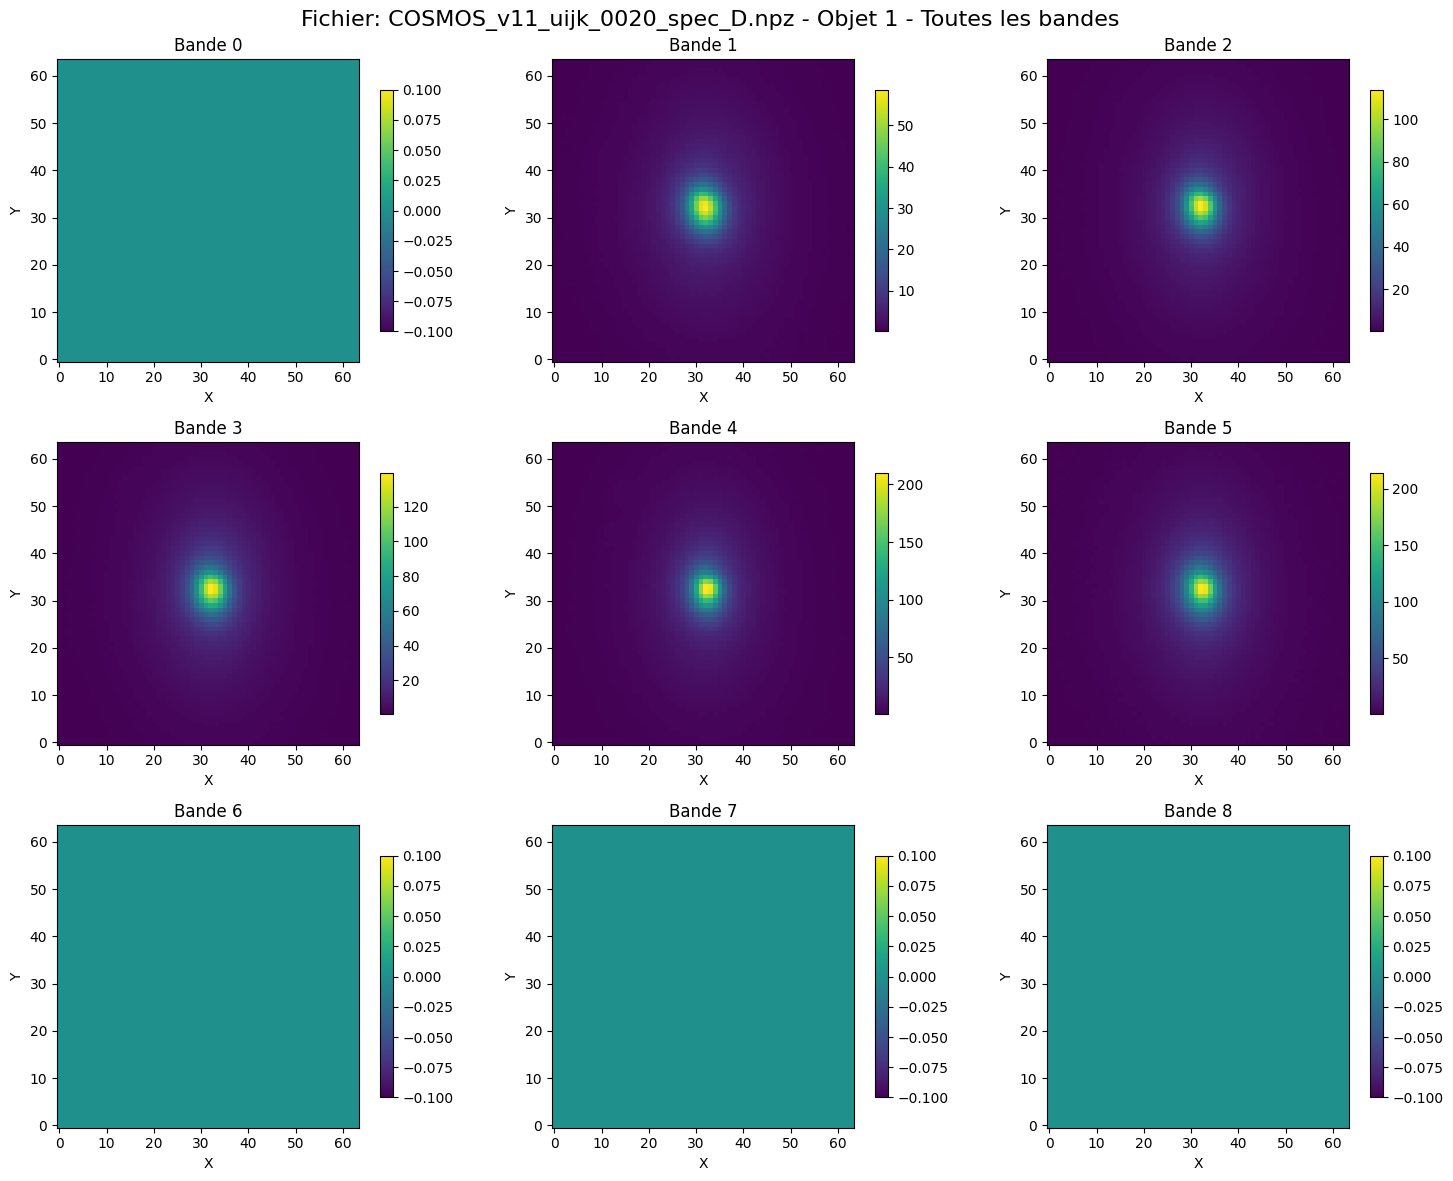

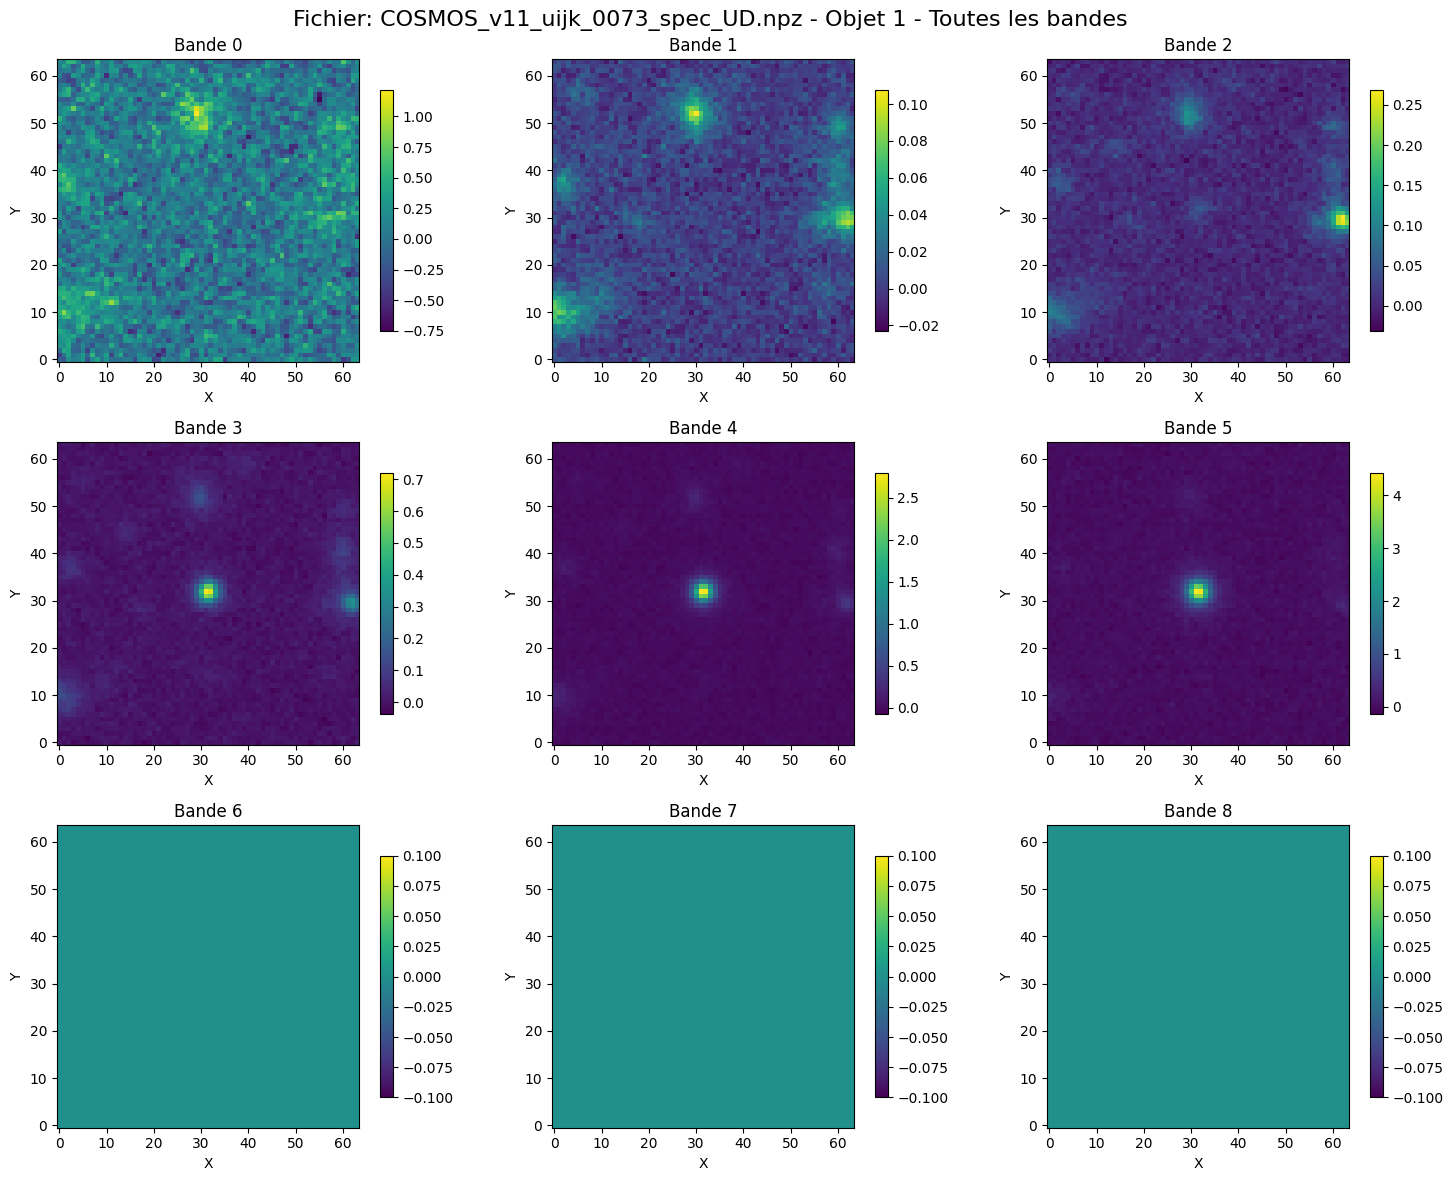

In [ ]:
for idx, data in enumerate(data_list):
    if 'cube' in data:
        cube_data = data['cube']
        obj_idx = 1  # Premier objet

        fig, axes = plt.subplots(3, 3, figsize=(15, 12))
        axes = axes.ravel()

        for band in range(min(9, cube_data.shape[3])):
            img = cube_data[obj_idx, :, :, band]
            axes[band].imshow(img, cmap='viridis', origin='lower')
            axes[band].set_title(f'Bande {band}')
            axes[band].set_xlabel('X')
            axes[band].set_ylabel('Y')
            plt.colorbar(axes[band].images[0], ax=axes[band], shrink=0.8)

        for i in range(cube_data.shape[3], 9):
            axes[i].set_visible(False)

        plt.suptitle(f'Fichier: {cosmos_files[idx]} - Objet {obj_idx} - Toutes les bandes', fontsize=16)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Le fichier {cosmos_files[idx]} n'a pas de clé 'cube'.")

## III- Préparation des données (filtrage et normalisation) pour le modèle deep learning 

Les données que le modèle prendra en entrée seront les images obtenues par les cubes. Pour cela il nous faut un processus de normalisation et de filtrage qu'on développera plus tard dans l'étude. Mais tout d'abord, observons les cubes avant chaque processus 

### III-1 Observation des vecteurs du cube 

In [19]:
info_array = data['cube'] # shape (N,)
print("Type du tableau:", type(info_array))
print("Type d'un élément:", type(info_array[0])) 
print("Premier élément:", info_array[0])

Type du tableau: <class 'numpy.ndarray'>
Type d'un élément: <class 'numpy.ndarray'>
Premier élément: [[[-0.19936417 -0.01222166 -0.01493508 ...  0.          0.
    0.        ]
  [-0.2017165   0.01378773  0.00845734 ...  0.          0.
    0.        ]
  [-0.16291438  0.01191892  0.00566468 ...  0.          0.
    0.        ]
  ...
  [-0.31022307  0.00078475  0.00650711 ...  0.          0.
    0.        ]
  [-0.11021934 -0.0032926   0.01916862 ...  0.          0.
    0.        ]
  [ 0.49585903  0.00155512  0.01636045 ...  0.          0.
    0.        ]]

 [[-0.23115514  0.00497446 -0.01255823 ...  0.          0.
    0.        ]
  [-0.44989076  0.00295185  0.02187352 ...  0.          0.
    0.        ]
  [-0.22055443  0.01583289  0.02538124 ...  0.          0.
    0.        ]
  ...
  [-0.45995042  0.00162512  0.01368777 ...  0.          0.
    0.        ]
  [ 0.03983143 -0.00751951  0.00160104 ...  0.          0.
    0.        ]
  [-0.18534754 -0.00357415  0.0048788  ...  0.          0.
 

### III-2 Observation des flags 

Nous devons observer les flags car le processus de filtrage s'opère sur les canaux qui ont un flag >= 5. 

In [ ]:
import numpy as np

# data_list contient déjà les fichiers spec chargés
# spec_files contient leurs noms
for i, data in enumerate(data_list):
    print(f"\nFlags du fichier {data_list[i]}:")
    flags = data['flag'] 
    print("Shape:", flags.shape)
    print("Valeurs uniques:", np.unique(flags))

    # Exemple: afficher les flags de chaque objet
    for obj_index, obj_flags in enumerate(flags):
        print(f"  Objet {obj_index}: {obj_flags}")




Flags du fichier NpzFile 'COSMOS_v11_uijk_0020_spec_D.npz' with keys: cube, info, flag:
Shape: (15, 9)
Valeurs uniques: [0 3]
  Objet 0: [0 0 0 0 0 0 3 3 3]
  Objet 1: [3 0 0 0 0 0 3 3 3]
  Objet 2: [3 0 0 0 0 0 3 3 3]
  Objet 3: [3 0 0 0 0 0 3 3 3]
  Objet 4: [3 0 0 0 0 0 3 3 3]
  Objet 5: [3 0 0 0 0 0 3 3 3]
  Objet 6: [3 0 0 0 0 0 3 3 3]
  Objet 7: [3 0 0 0 0 0 3 3 3]
  Objet 8: [3 0 0 0 0 0 3 3 3]
  Objet 9: [3 0 0 0 0 0 3 3 3]
  Objet 10: [3 0 0 0 0 0 3 3 3]
  Objet 11: [3 0 0 0 0 0 3 3 3]
  Objet 12: [3 0 0 0 0 0 3 3 3]
  Objet 13: [3 0 0 0 0 0 3 3 3]
  Objet 14: [3 0 0 0 0 0 3 3 3]

Flags du fichier NpzFile 'COSMOS_v11_uijk_0073_spec_UD.npz' with keys: cube, info, flag:
Shape: (12, 9)
Valeurs uniques: [0 1]
  Objet 0: [0 0 0 0 0 0 1 1 1]
  Objet 1: [0 0 0 0 0 0 1 1 1]
  Objet 2: [0 0 0 0 0 0 1 1 1]
  Objet 3: [0 0 0 0 0 0 1 1 1]
  Objet 4: [0 0 0 0 0 0 1 1 1]
  Objet 5: [0 0 0 0 0 0 1 1 1]
  Objet 6: [0 0 0 0 0 0 1 1 1]
  Objet 7: [0 0 0 0 0 0 1 1 1]
  Objet 8: [0 0 0 0 0 0 1 1

Comme nous pouvons observer, dans notre jeu de d'entraînement, aucun canal n'a un flag >= 5. Nous n'avons donc pas besoin de filtrer notre jeu de données 

### III- 3 Normalisation 

La fonction ci-dessous permet de faire une normalisation linéaire. <br/>
Mathématiquement, cela se présente : <br/>. 
            $n(x) = \operatorname{sign}(x)\,\sqrt{|x| + 1} - 1$


In [ ]:
def normalize_cube(cube):
    return np.sign(cube) * np.sqrt(np.abs(cube) + 1) - 1
cube = data['cube']  
cube_norm = normalize_cube(cube)

#### Voici à quoi ressemble maintenant nos cubes normalisés 

In [18]:
info_array = cube_norm # shape (N,)
print("Type du tableau:", type(info_array))
print("Type d'un élément:", type(info_array[0])) 
print("Premier élément:", info_array[0])

Type du tableau: <class 'numpy.ndarray'>
Type d'un élément: <class 'numpy.ndarray'>
Premier élément: [[[-2.09515476e+00 -2.00609231e+00 -2.00743985e+00 ... -1.00000000e+00
   -1.00000000e+00 -1.00000000e+00]
  [-2.09622836e+00  6.87026978e-03  4.21977043e-03 ... -1.00000000e+00
   -1.00000000e+00 -1.00000000e+00]
  [-2.07838511e+00  5.94174862e-03  2.82835960e-03 ... -1.00000000e+00
   -1.00000000e+00 -1.00000000e+00]
  ...
  [-2.14464974e+00  3.92317772e-04  3.24833393e-03 ... -1.00000000e+00
   -1.00000000e+00 -1.00000000e+00]
  [-2.05366945e+00 -2.00164509e+00  9.53876972e-03 ... -1.00000000e+00
   -1.00000000e+00 -1.00000000e+00]
  [ 2.23053217e-01  7.77244568e-04  8.14700127e-03 ... -1.00000000e+00
   -1.00000000e+00 -1.00000000e+00]]

 [[-2.10957432e+00  2.48420238e-03 -2.00625944e+00 ... -1.00000000e+00
   -1.00000000e+00 -1.00000000e+00]
  [-2.20411396e+00  1.47485733e-03  1.08776093e-02 ... -1.00000000e+00
   -1.00000000e+00 -1.00000000e+00]
  [-2.10478711e+00  7.88533688e-03 

### IV- Test de Prediction d'un modele maison d'Architecture CNN 

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from sklearn.model_selection import train_test_split
import sys

print("---CHARGEMENT ET PRETRAITEMENT---")

X_list = []
Y_list = []

# CHARGEMENT DES DONNÉES
if not os.path.exists(data_list):
    sys.exit(f"ERREUR : Dossier {data_list} introuvable.")

fichiers = [f for f in os.listdir(data_list) if f.endswith(".npz") and "photo" in f]

for i, fname in enumerate(fichiers):
    try:
        path = os.path.join(data_list, fname)
        with np.load(path, allow_pickle=True) as data:

            cubes = data['cube']   
            info  = data['info']   
            flags = data['flag']   

            
            if 'ZPHOT' in info.dtype.names:
                z_phot = info['ZPHOT']
            elif 'Z' in info.dtype.names:
                z_phot = info['Z']
            else:
                continue

            #FILTRAGE
            mask_z = (z_phot > 0.0) & (z_phot < 6.0) & (~np.isnan(z_phot))

            # On vérifie si flags est bien matriciel ou vecteur et que 
            #toutes les bandes soient <=5)
            if len(flags.shape) > 1:
                mask_flag = np.all(flags <= 5, axis=1)
            else:
                mask_flag = (flags <= 5)

            valid_mask = mask_z & mask_flag

            x_kept = cubes[valid_mask]
            y_kept = z_phot[valid_mask]

            if len(x_kept) > 0:
                X_list.append(x_kept)
                Y_list.append(y_kept)
            else:
                pass 

    except Exception as e:
        print(f"Erreur fichier {fname}: {e}")

if len(X_list) == 0:
    sys.exit("ERREUR : Aucun objet chargé. Vérifiez vos filtres.")

# Concaténation
X = np.concatenate(X_list, axis=0)
Y = np.concatenate(Y_list, axis=0)
X = np.nan_to_num(X, nan=0.0)

print(f"Données brutes chargées : Images {X.shape}, Redshifts {Y.shape}")

#GESTION DES DIMENSIONS
# On détecte ça : si la dimension 1 est petite (ex: 9 bandes) et les dim 2/3 sont grandes (ex: 96 pixels)
if X.shape[1] < X.shape[2]:
    print("Transposition des canaux : (N, C, H, W) -> (N, H, W, C)")
    X = np.transpose(X, (0, 2, 3, 1))
elif len(X.shape) == 3:
    # Si c'est (N, H, W) noir et blanc, on ajoute une dimension
    X = np.expand_dims(X, axis=-1)

print(f"Shape finale entrée CNN : {X.shape}")

#NORMALISATION X (IMAGES)
print("Normalisation Images (Arcsinh + MinMax)...")
X = np.sign(X) * (np.sqrt(np.abs(X) + 1) - 1)
X_min, X_max = X.min(), X.max()
X = (X - X_min) / (X_max - X_min + 1e-9)

print("Normalisation Redshift (0-1)...")
Y_min = Y.min()
Y_max = Y.max()
Y_scaled = (Y - Y_min) / (Y_max - Y_min)

# Split
X_train, X_val, y_train, y_val = train_test_split(X, Y_scaled, test_size=0.2, random_state=42)

# ARCHITECTURE MODÈLE
# Ils utilisent des noyaux 5x5 et pas mal de dropout.

def create_model_inspired(input_shape):
    model = models.Sequential()
    model.add(layers.Input(shape=input_shape))
    model.add(layers.Conv2D(32, (5, 5), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Flatten())

 
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(1, activation='linear'))

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

model = create_model_inspired(X_train.shape[1:])
model.summary()


early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-6)

print("\n--- DÉBUT ENTRAINEMENT ---")
history = model.fit(
    X_train, y_train,
    epochs=50,
    validation_data=(X_val, y_val),
    batch_size=64,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

#ANALYSE DES RÉSULTATS
preds_scaled = model.predict(X_val)
preds_real = preds_scaled * (Y_max - Y_min) + Y_min
y_val_real = y_val * (Y_max - Y_min) + Y_min

plt.figure(figsize=(12, 5))

# Courbe de Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Val Loss (MSE)')
plt.title('Convergence du Modèle')
plt.xlabel('Epochs')
plt.legend()

# Scatter Plot (Réalité vs Prédiction)
plt.subplot(1, 2, 2)
plt.scatter(y_val_real, preds_real, alpha=0.3, s=3, c='blue')
plt.plot([Y_min, Y_max], [Y_min, Y_max], 'r--', linewidth=2, label='Parfait')
plt.xlabel('Vrai Redshift (Z)')
plt.ylabel('Redshift Prédit')
plt.title(f'Prédictions (MAE réelle: {np.mean(np.abs(y_val_real - preds_real.flatten())):.4f})')
plt.legend()

plt.show()